<a href="https://colab.research.google.com/github/namoshi/mathAI/blob/master/py_stat_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import statistics
import matplotlib.pyplot as plt

# 学生の身長のデータ


|  学生 |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |  10 |  11 |  12 |  13 |  14 |  15 | <br>
|  身長 | 178 | 165 | 168 | 152 | 175 | 175 | 165 | 162 | 164 | 170 | 169 | 155 | 153 | 162 | 168 |



In [3]:
# 学生の身長のデータ
heights = np.array([178, 165, 168, 152, 175, 175, 165, 162, 164, 170, 169, 155, 153, 162, 168], dtype=float)

print(len(heights))
print(heights)

15
[178. 165. 168. 152. 175. 175. 165. 162. 164. 170. 169. 155. 153. 162.
 168.]


## ヒストグラム

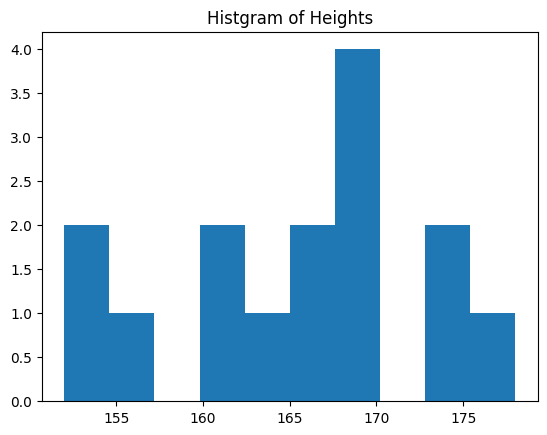

In [4]:
plt.title('Histgram of Heights')
plt.hist(heights)
plt.savefig('height_hist.png')
plt.show()


## 代表値（平均，メディアン，四分位点，モード）

In [5]:
# 平均

# 定義通りに計算
print('Mean=', np.sum(heights)/len(heights))

# ベクトル表現
print('Mean=', np.dot(heights, np.ones(len(heights)))/len(heights))

# Python package (statistics) を利用
mean_heights = statistics.mean(heights)
print('Mean=', mean_heights)


Mean= 165.4
Mean= 165.4
Mean= 165.4


In [6]:
# メディアン

# 定義通りに計算
sorted_heights = np.sort(heights)
print(sorted_heights)

m = len(sorted_heights) // 2
print(m)

if len(sorted_heights) % 2 == 0:
    median_heights = (sorted_heights[m] + sorted_heights[m+1]) / 2.0
else:
    median_heights = sorted_heights[m]

print('median=', median_heights)

# Python package (statistics) を利用
median_heights = statistics.median(sorted_heights)
print('median=', median_heights)


[152. 153. 155. 162. 162. 164. 165. 165. 168. 168. 169. 170. 175. 175.
 178.]
7
median= 165.0
median= 165.0


In [7]:
# パーセンタイル，モードの計算

print('Quantiles:', statistics.quantiles(heights))

print('mode=', statistics.mode(heights))

Quantiles: [162.0, 165.0, 170.0]
mode= 165.0


## 分散と標準偏差

In [8]:
# 分散と標準偏差

Var = statistics.variance(heights)
print('Varaicne=', Var)

SD = statistics.stdev(heights)
print('Standard Deviation=', SD)


Varaicne= 61.25714285714286
Standard Deviation= 7.826694248349226


In [9]:
# データの標準化と偏差値

math_scores = np.array([82, 43, 56, 77, 96, 35, 68, 91, 55, 85], dtype=float)

math_mean = statistics.mean(math_scores)
print('Mean=', math_mean)

math_sd = statistics.stdev(math_scores)
print('SD=', math_sd)

# 標準化
math_z = (math_scores - math_mean) / math_sd
print('Standarlized Scores\n', math_z)

# 偏差値
x = 90.0
y = 10.0 * (x - math_mean) / math_sd + 50.0
print('T-score of %f = %f' % (x, y))


Mean= 68.8
SD= 20.815592446262222
Standarlized Scores
 [ 0.63414001 -1.23945547 -0.61492365  0.39393546  1.30671275 -1.62378275
 -0.03843273  1.0665082  -0.66296456  0.77826274]
T-score of 90.000000 = 60.184673


## 散布図

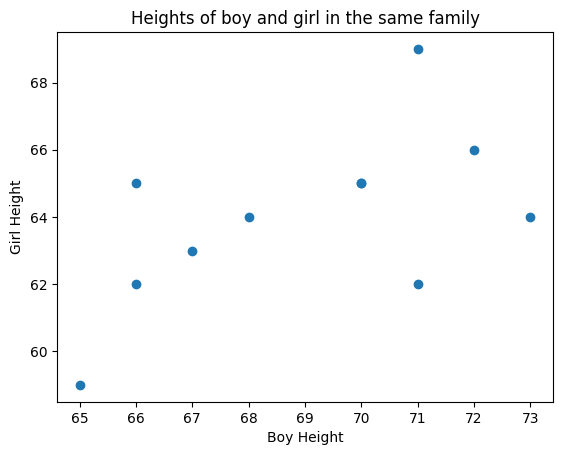

In [10]:
# 家族の身長のデータ
boys_height = np.array([71, 68, 66, 67, 70, 71, 70, 73, 72, 65, 66], dtype=float)
girls_height = np.array([69, 64, 65, 63, 65, 62, 65, 64, 66, 59, 62], dtype=float)

plt.title('Heights of boy and girl in the same family')
plt.scatter(boys_height, girls_height)
plt.xlabel('Boy Height')
plt.ylabel('Girl Height')
plt.savefig('family_height.png')
plt.show()


## 共分散と相関係数

In [11]:
# それそれの平均
boys_mean = statistics.mean(boys_height)
girls_mean = statistics.mean(girls_height)
print('Boys mean=', boys_mean, 'Girls mean=', girls_mean)

boys_var = statistics.variance(boys_height)
girls_var = statistics.variance(girls_height)
print('Boys variance=', boys_var, 'Girls variance=', girls_var)

coval = statistics.covariance(boys_height, girls_height)
print('Covariance=', coval)

corr = statistics.correlation(boys_height, girls_height)
print('Correlation=', corr)

Boys mean= 69.0 Girls mean= 64.0
Boys variance= 7.4 Girls variance= 6.6
Covariance= 3.9
Correlation= 0.5580547118563389


## 分散共分散行列

\begin{align*}
  \Sigma = \frac{1}{n} \sum_{i=1}^n (\bf{x}_i - \bar{\bf{x}}) (\bf{x}_i - \bar{\bf{x}})^T
\end{align*}

In [28]:
# concatenate boys_height and girls_height

X = np.concatenate((boys_height, girls_height), axis=0).reshape((2, 11))

print('X\n', X.T)

Sigma = np.cov(X)

print('Covariance Matrix\n', Sigma)

X
 [[71. 69.]
 [68. 64.]
 [66. 65.]
 [67. 63.]
 [70. 65.]
 [71. 62.]
 [70. 65.]
 [73. 64.]
 [72. 66.]
 [65. 59.]
 [66. 62.]]
Covariance Matrix
 [[7.4 3.9]
 [3.9 6.6]]
